# Analyzing My Room Condition


## Import Modules


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from datetime import datetime
import csv
import os

## Select Data


In [77]:
dir_path = "../data/"
file_list = os.listdir(dir_path)
# print(file_list)
file_list_maxlen = len(file_list)

print(f"Max Length >> {file_list_maxlen}")
for i in range(len(file_list)):
    print(i, end=": ")
    print(file_list[i])

print()
state = True

userInput = int(input(f"Select File Index{file_list}"))
print(f"UserInput >> {userInput}", end=", ")
print(f"Selected >> {file_list[userInput]}")

Max Length >> 4
0: data_demo_231228.txt
1: data_231224.TXT
2: data_231225.txt
3: ROOMTEMP.TXT

UserInput >> 0, Selected >> data_demo_231228.txt


In [78]:
file_path_master = "../data/"
print(file_list[userInput])

FILE_PATH = f"{file_path_master}{file_list[userInput]}"
print(f"File Path Set >> {FILE_PATH}")

data_demo_231228.txt
File Path Set >> ../data/data_demo_231228.txt


## Variables


In [79]:
CURRTIME = str(datetime.now())
CURRTIME = CURRTIME[2:19]
CURRTIME = CURRTIME.replace("-", "").replace(":", "").replace(" ", "-")

print(CURRTIME)

231228-220148


In [80]:
font_path = "NanumBarunGothic-YetHangul.otf"


with open(FILE_PATH, "r") as f:
    data = f.readlines()
FILE = data
# print(FILE)

data_list = []

for item in FILE:
    item = item.replace("\n", "")
    item = item.split()
    temp = f"{item[0]} {item[1]}"
    item.insert(0, temp)
    temp = [">>", item[1], item[2]]
    for i in temp:
        index = item.index(i)
        item.pop(index)
    data_list.append(item)
# print(data_list)

print(data_list[0])
MAX = len(data_list)
print(f"Max Length >> {MAX}")

['01.01.2000 00:27:07', '19', '53', '0.86', '52.85']
Max Length >> 461


## Convert to DataFrame


In [81]:
df = pd.DataFrame(data_list)

df.rename(
    columns={
        0: "Date",
        # 1: "Time",
        1: "Temperature",
        2: "Humidity",
        3: "Voltage",
        4: "DustDensity",
    },
    inplace=True,
)

df = df.astype(
    {
        "Temperature": "int",
        "Humidity": "float",
        "Voltage": "float",
        "DustDensity": "float",
    }
)

df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y %H:%M:%S")

df.set_index("Date", inplace=True)

print(df.info())
print(df.head())
df.dtypes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461 entries, 2000-01-01 00:27:07 to 2000-01-01 01:22:59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  461 non-null    int64  
 1   Humidity     461 non-null    float64
 2   Voltage      461 non-null    float64
 3   DustDensity  461 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 18.0 KB
None
                     Temperature  Humidity  Voltage  DustDensity
Date                                                            
2000-01-01 00:27:07           19      53.0     0.86        52.85
2000-01-01 00:27:09           19      53.0     0.89        58.71
2000-01-01 00:27:12           19      53.0     0.93        66.52
2000-01-01 00:27:14           19      53.0     0.85        49.92
2000-01-01 00:27:16           19      53.0     0.87        53.83


Temperature      int64
Humidity       float64
Voltage        float64
DustDensity    float64
dtype: object

## Check Data


In [82]:
df

,Temperature,Humidity,Voltage,DustDensity
Date,,,,
2000-01-01 00:27:07,19,53.0,0.86,52.85
2000-01-01 00:27:09,19,53.0,0.89,58.71
2000-01-01 00:27:12,19,53.0,0.93,66.52
2000-01-01 00:27:14,19,53.0,0.85,49.92
2000-01-01 00:27:16,19,53.0,0.87,53.83
...,...,...,...,...
2000-01-01 01:20:00,19,53.0,0.83,46.02
2000-01-01 01:21:00,19,53.0,0.83,46.99
2000-01-01 01:21:59,19,53.0,0.91,61.64


## Check Null Data


In [83]:
print(df.isnull().sum())

# ###################

# df = df.fillna(method="pad", axis=0)
# # df = df.fillna(df.interpolate(), axis=0)


# # print(df)
# df.to_csv("MYROOM.csv")
# ###################

# print(df.isnull().sum())

Temperature    0
Humidity       0
Voltage        0
DustDensity    0
dtype: int64


## Draw Graph


### check data


In [84]:
df

,Temperature,Humidity,Voltage,DustDensity
Date,,,,
2000-01-01 00:27:07,19,53.0,0.86,52.85
2000-01-01 00:27:09,19,53.0,0.89,58.71
2000-01-01 00:27:12,19,53.0,0.93,66.52
2000-01-01 00:27:14,19,53.0,0.85,49.92
2000-01-01 00:27:16,19,53.0,0.87,53.83
...,...,...,...,...
2000-01-01 01:20:00,19,53.0,0.83,46.02
2000-01-01 01:21:00,19,53.0,0.83,46.99
2000-01-01 01:21:59,19,53.0,0.91,61.64


### Draw Function


In [85]:
def DrawGraph(types: str):
    if types == "temp":
        y1 = df["Temperature"]
        y2 = df["Humidity"]
        graph_title = "Temperature & Humidity"
        fname = "temp"
    elif types == "dust":
        y1 = df["Voltage"]
        y2 = df["DustDensity"]
        graph_title = "Fine-Dust"
        fname = "finedust"

    fig, ax1 = plt.subplots()
    # fig.set_size_inches(10, 6)
    fig.set_size_inches(16, 9)
    # fig.set_size_inches(20, 12)

    color_1 = "tab:blue"
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Y1 value (blue)", fontsize=14, color=color_1)
    ax1.plot(df.index, y1, marker="s", label="Temperature", color=color_1)
    ax1.tick_params(axis="y", labelcolor=color_1)

    ax2 = ax1.twinx()
    color_2 = "tab:red"
    ax2.set_ylabel("Y2 value (red)", fontsize=14, color=color_2)
    ax2.plot(df.index, y2, marker="o", label="Humidity", color=color_2)
    ax2.tick_params(axis="y", labelcolor=color_2)

    fig.tight_layout()
    ax1.set_title(f"Room {graph_title} Level", fontsize=16)
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.grid()
    plt.show()
    fig.savefig(f"room_{CURRTIME}_{fname}.png")

### OUTPUT


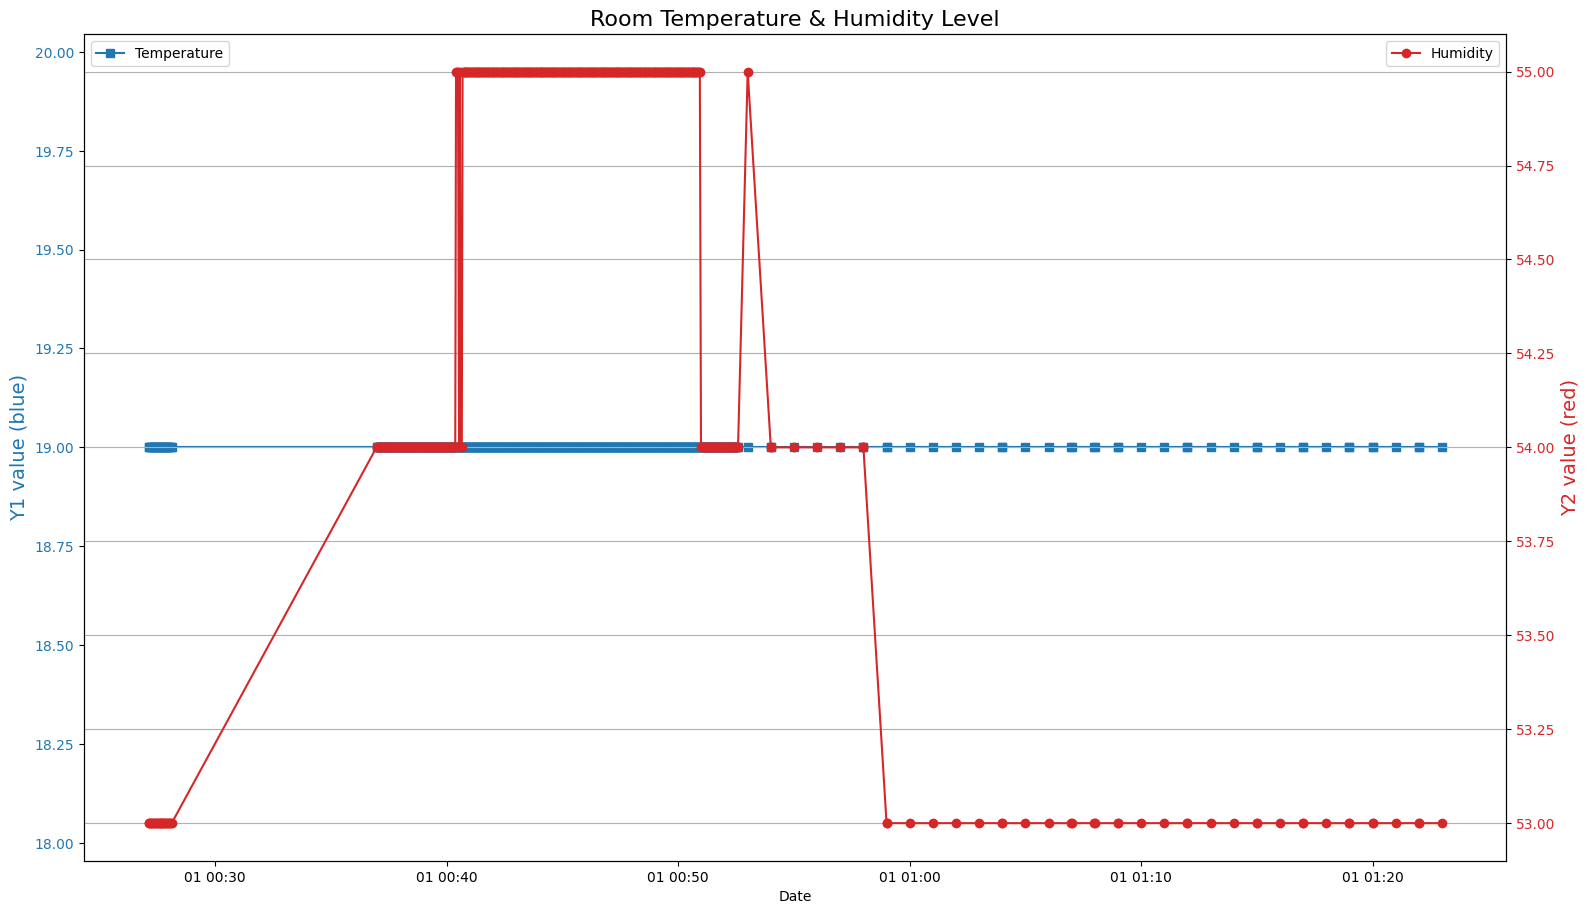

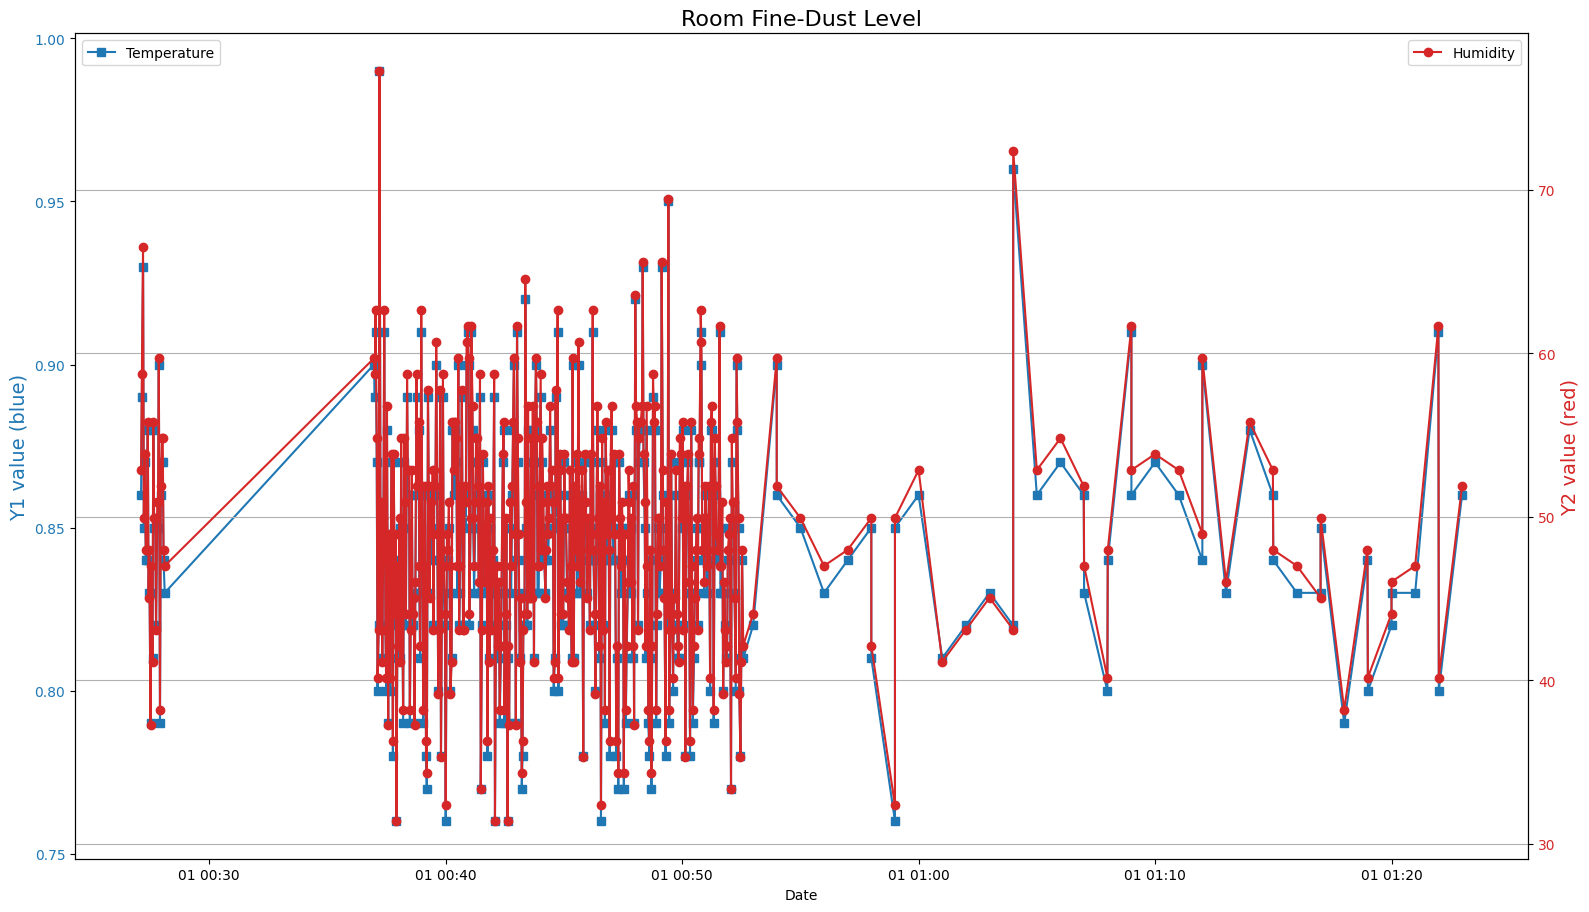

In [86]:
DrawGraph("temp")
DrawGraph("dust")

In [87]:
raise Exception("End Of File!")

Exception: End Of File!